In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('/content/drive/MyDrive/tallertesis1/datasets/merged_energy_forecast_previous_day.csv', parse_dates=["datetime"])

In [5]:
df.columns

Index(['Unnamed: 0', 'Project Name', 'datetime', 'Power[kWh]',
       'Power_ConfInt10[kWh]', 'Power_ConfInt25[kWh]', 'Power_ConfInt75[kWh]',
       'Power_ConfInt90[kWh]', 'W.Speed[m/s]', 'W.Speed P10[m/s]',
       'W.Speed P25[m/s]', 'W.Speed P75[m/s]', 'W.Speed P90[m/s]',
       'W.Direc[deg]', 'pred_date_energia', 'despacho', 'time_energia',
       'wind_speed_10m_energia', 'wind_direction_10m_energia',
       'wind_gusts_10m_energia', 'temperature_2m_energia',
       'pressure_msl_energia', 'relative_humidity_2m_energia', 'hour', 'date',
       'time_for', 'wind_speed_10m_for', 'wind_direction_10m_for',
       'wind_gusts_10m_for', 'temperature_2m_for', 'pressure_msl_for',
       'relative_humidity_2m_for', 'pred_date_for', 'time',
       'forecast_for_date', 'wind_speed_10m_previous_day0',
       'wind_direction_10m_previous_day0', 'temperature_2m_previous_day0',
       'relative_humidity_2m_previous_day0', 'pressure_msl_previous_day0',
       'precipitation_previous_day0', 'clou

In [6]:
df = df.rename(columns={"despacho": "ene_gen_mwh"})
df = df.set_index("datetime").sort_index()

#Modelo 2

In [7]:
# Crear copia para trabajar con datos combinados
df_comb = df.copy()

# Reemplazar columnas previous_day0 por previous_day1 solo en marzo 2025
cols_day = ['wind_speed_10m', 'wind_direction_10m', 'temperature_2m',
            'pressure_msl', 'relative_humidity_2m']

for var in cols_day:
    day0_col = f"{var}_previous_day0"
    day2_col = f"{var}_previous_day2"

    df_comb.loc["2025-03-01":"2025-03-31", day0_col] = df_comb.loc["2025-03-01":"2025-03-31", day2_col]


In [8]:
df_2 = df_comb[[
    'wind_speed_10m_previous_day0',
    'wind_direction_10m_previous_day0',
    'temperature_2m_previous_day0',
    'pressure_msl_previous_day0',
    'relative_humidity_2m_previous_day0',
    'ene_gen_mwh'
]].copy()

In [9]:
df_2.columns

Index(['wind_speed_10m_previous_day0', 'wind_direction_10m_previous_day0',
       'temperature_2m_previous_day0', 'pressure_msl_previous_day0',
       'relative_humidity_2m_previous_day0', 'ene_gen_mwh'],
      dtype='object')

In [10]:
df_2.isna().sum()

,0
wind_speed_10m_previous_day0,0
wind_direction_10m_previous_day0,0
temperature_2m_previous_day0,0
pressure_msl_previous_day0,0
relative_humidity_2m_previous_day0,0
ene_gen_mwh,0


In [11]:
df_2.tail(24)

,wind_speed_10m_previous_day0,wind_direction_10m_previous_day0,temperature_2m_previous_day0,pressure_msl_previous_day0,relative_humidity_2m_previous_day0,ene_gen_mwh
datetime,,,,,,
2025-03-31 00:00:00,30.962095,359.333800,23.472000,1005.2,91.0,34.309584
2025-03-31 01:00:00,31.328272,1.316893,23.322000,1004.6,91.0,34.953648
2025-03-31 02:00:00,30.248568,1.363898,23.072000,1004.7,91.0,39.076848
2025-03-31 03:00:00,30.259275,2.045373,23.022001,1004.7,91.0,42.222560
2025-03-31 04:00:00,30.602118,0.674022,23.072000,1005.0,90.0,42.479104
2025-03-31 05:00:00,30.633865,2.694228,22.872002,1005.7,92.0,38.497680
2025-03-31 06:00:00,30.962095,0.666194,22.872002,1006.7,91.0,35.132544
2025-03-31 07:00:00,30.293522,3.406384,23.122002,1007.6,90.0,41.494736
2025-03-31 08:00:00,33.636406,354.472530,23.972000,1008.9,85.0,17.138384


In [12]:
import numpy as np
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import lightgbm as lgb

In [13]:
# === Ingeniería de variables extendida para day2 (sin rolling, sin leakage) ===

# Variables temporales
df_2["hour"] = df_2.index.hour
df_2["month"] = df_2.index.month
df_2["dayofweek"] = df_2.index.dayofweek

# Componentes vectoriales del viento
df_2["wind_u_prev0"] = df_2["wind_speed_10m_previous_day0"] * np.cos(np.radians(df_2["wind_direction_10m_previous_day0"]))
df_2["wind_v_prev0"] = df_2["wind_speed_10m_previous_day0"] * np.sin(np.radians(df_2["wind_direction_10m_previous_day0"]))

# Lags meteorológicos inmediatos
for var in ["wind_speed_10m_previous_day0", "wind_direction_10m_previous_day0", "wind_u_prev0", "wind_v_prev0"]:
    df_2[f"{var}_lag1"] = df_2[var].shift(1)
    df_2[f"{var}_lag2"] = df_2[var].shift(2)

# Delta de 1 hora
df_2["wind_delta_1h_prev0"] = df_2["wind_speed_10m_previous_day0"] - df_2["wind_speed_10m_previous_day0"].shift(1)

# Lags de generación real ajustados para day2 (72 y 96 horas atrás)
df_2["ene_gen_mwh_lag72"] = df_2["ene_gen_mwh"].shift(72)
df_2["ene_gen_mwh_lag96"] = df_2["ene_gen_mwh"].shift(96)
df_2["ene_gen_mwh_lag2160"] = df_2["ene_gen_mwh"].shift(2160)  # 3 meses
df_2["ene_gen_mwh_lag4320"] = df_2["ene_gen_mwh"].shift(4320)  # 6 meses
df_2["ene_gen_mwh_lag8760"] = df_2["ene_gen_mwh"].shift(8760)  # 1 año

# Deltas de generación ajustados para day2
df_2["ene_gen_mwh_delta72_96"] = df_2["ene_gen_mwh_lag72"] - df_2["ene_gen_mwh_lag96"]
df_2["ene_gen_mwh_delta2160_4320"] = df_2["ene_gen_mwh_lag2160"] - df_2["ene_gen_mwh_lag4320"]
df_2["ene_gen_mwh_delta72_2160"] = df_2["ene_gen_mwh_lag72"] - df_2["ene_gen_mwh_lag2160"]
df_2["ene_gen_mwh_delta96_8760"] = df_2["ene_gen_mwh_lag96"] - df_2["ene_gen_mwh_lag8760"]

# === Lista de features seleccionadas para day2 ===
features = [
    'wind_speed_10m_previous_day0', 'wind_direction_10m_previous_day0',
    'temperature_2m_previous_day0', 'pressure_msl_previous_day0', 'relative_humidity_2m_previous_day0',
    'wind_u_prev0', 'wind_v_prev0',
    'wind_speed_10m_previous_day0_lag1', 'wind_speed_10m_previous_day0_lag2',
    'wind_direction_10m_previous_day0_lag1', 'wind_direction_10m_previous_day0_lag2',
    'wind_u_prev0_lag1', 'wind_u_prev0_lag2',
    'wind_v_prev0_lag1', 'wind_v_prev0_lag2',
    'wind_delta_1h_prev0',
    'ene_gen_mwh_lag72', 'ene_gen_mwh_lag96', 'ene_gen_mwh_lag2160', 'ene_gen_mwh_lag4320', 'ene_gen_mwh_lag8760',
    'ene_gen_mwh_delta72_96', 'ene_gen_mwh_delta2160_4320', 'ene_gen_mwh_delta72_2160', 'ene_gen_mwh_delta96_8760',
    'hour', 'month', 'dayofweek'
]

In [14]:
df_2.columns

Index(['wind_speed_10m_previous_day0', 'wind_direction_10m_previous_day0',
       'temperature_2m_previous_day0', 'pressure_msl_previous_day0',
       'relative_humidity_2m_previous_day0', 'ene_gen_mwh', 'hour', 'month',
       'dayofweek', 'wind_u_prev0', 'wind_v_prev0',
       'wind_speed_10m_previous_day0_lag1',
       'wind_speed_10m_previous_day0_lag2',
       'wind_direction_10m_previous_day0_lag1',
       'wind_direction_10m_previous_day0_lag2', 'wind_u_prev0_lag1',
       'wind_u_prev0_lag2', 'wind_v_prev0_lag1', 'wind_v_prev0_lag2',
       'wind_delta_1h_prev0', 'ene_gen_mwh_lag72', 'ene_gen_mwh_lag96',
       'ene_gen_mwh_lag2160', 'ene_gen_mwh_lag4320', 'ene_gen_mwh_lag8760',
       'ene_gen_mwh_delta72_96', 'ene_gen_mwh_delta2160_4320',
       'ene_gen_mwh_delta72_2160', 'ene_gen_mwh_delta96_8760'],
      dtype='object')

In [15]:
df_2.head()

,wind_speed_10m_previous_day0,wind_direction_10m_previous_day0,temperature_2m_previous_day0,pressure_msl_previous_day0,relative_humidity_2m_previous_day0,ene_gen_mwh,hour,month,dayofweek,wind_u_prev0,...,wind_delta_1h_prev0,ene_gen_mwh_lag72,ene_gen_mwh_lag96,ene_gen_mwh_lag2160,ene_gen_mwh_lag4320,ene_gen_mwh_lag8760,ene_gen_mwh_delta72_96,ene_gen_mwh_delta2160_4320,ene_gen_mwh_delta72_2160,ene_gen_mwh_delta96_8760
datetime,,,,,,,,,,,,,,,,,,,,,
2024-01-22 00:00:00,13.698934,356.98727,26.172,1009.7,87.0,23.38,0,1,0,13.680000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-22 01:00:00,9.255571,346.50424,25.672,1009.3,89.0,25.54,1,1,0,8.999999,...,-4.443363,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-22 02:00:00,2.545584,278.13000,24.972,1010.4,92.0,14.89,2,1,0,0.359995,...,-6.709987,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-22 03:00:00,6.792466,212.00534,24.572,1011.2,93.0,10.35,3,1,0,-5.760002,...,4.246882,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-01-22 04:00:00,11.681987,213.69010,24.222,1011.7,90.0,12.79,4,1,0,-9.719997,...,4.889521,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df_2.isna().sum()

,0
wind_speed_10m_previous_day0,0
wind_direction_10m_previous_day0,0
temperature_2m_previous_day0,0
pressure_msl_previous_day0,0
relative_humidity_2m_previous_day0,0
ene_gen_mwh,0
hour,0
month,0
dayofweek,0
wind_u_prev0,0


In [17]:
from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, make_scorer
import lightgbm as lgb

# === División temporal ===
df_train = df_2[df_2.index < "2025-03-01"].copy()
df_test = df_2[df_2.index >= "2025-03-01"].copy()

# 💥 Protección contra data leakage
df_test["ene_gen_mwh"] = None

X_train = df_train[features]
y_train = df_train["ene_gen_mwh"]
X_test = df_test[features]
y_test = df_test["ene_gen_mwh"]

# === TimeSeriesSplit y visualización ===
print("=== División de FOLDS en entrenamiento ===")
tscv = TimeSeriesSplit(n_splits=5)

for i, (train_idx, val_idx) in enumerate(tscv.split(X_train)):
    train_start = X_train.index[train_idx[0]]
    train_end = X_train.index[train_idx[-1]]
    val_start = X_train.index[val_idx[0]]
    val_end = X_train.index[val_idx[-1]]

    print(f"📂 Fold {i+1}")
    print(f"  🔹 Entrenamiento: {train_start} → {train_end} ({len(train_idx)} registros)")
    print(f"  🔸 Validación:    {val_start} → {val_end} ({len(val_idx)} registros)\n")

# === Evaluación manual de cada fold ===
print("=== Evaluación manual de cada fold con LightGBM ===")

for i, (train_idx, val_idx) in enumerate(tscv.split(X_train)):
    X_tr = X_train.iloc[train_idx]
    y_tr = y_train.iloc[train_idx]
    X_val = X_train.iloc[val_idx]
    y_val = y_train.iloc[val_idx]

    # Entrenamiento simple
    model_fold = lgb.LGBMRegressor(
        objective='regression',
        boosting_type='gbdt',
        random_state=42,
        n_jobs=-1
    )
    model_fold.fit(X_tr, y_tr)

    # Predicción y RMSE
    y_pred = model_fold.predict(X_val)
    fold_rmse = mean_squared_error(y_val, y_pred) ** 0.5


    val_start = X_val.index[0]
    val_end = X_val.index[-1]
    print(f"📂 Fold {i+1}: {val_start.date()} → {val_end.date()} | RMSE = {fold_rmse:.3f}")

# === RMSE personalizado para GridSearchCV ===
def rmse(y_true, y_pred):
    return mean_squared_error(y_true, y_pred) ** 0.5


rmse_scorer = make_scorer(rmse, greater_is_better=False)

# === GridSearchCV con LightGBM ===
param_grid = {
    'n_estimators': [50, 100],
    'num_leaves': [31, 50],
    'max_depth': [-1, 10],
    'learning_rate': [0.05, 0.1]
}

lgb_model = lgb.LGBMRegressor(
    objective='regression',
    boosting_type='gbdt',
    random_state=42,
    n_jobs=-1
)

grid_search = GridSearchCV(
    estimator=lgb_model,
    param_grid=param_grid,
    cv=tscv,
    scoring=rmse_scorer,
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)
best_model = grid_search.best_estimator_

# === Evaluación final en marzo ===
y_pred = best_model.predict(X_test)
y_test = df_2.loc[df_test.index, "ene_gen_mwh"]  # 💡 usamos los datos reales

if y_test.notna().all():
    rmse_marzo = rmse(y_test, y_pred)
    mae_marzo = mean_absolute_error(y_test, y_pred)
    r2_marzo = r2_score(y_test, y_pred)

    print("\n📊 Evaluación del modelo LightGBM en marzo 2025:")
    print(f"🔹 RMSE: {rmse_marzo:.3f}")
    print(f"🔹 MAE:  {mae_marzo:.3f}")
    print(f"🔹 R²:   {r2_marzo:.3f}")
else:
    print("\n⚠️ Marzo no tiene todos los valores reales. Solo se generaron predicciones.")




=== División de FOLDS en entrenamiento ===
📂 Fold 1
  🔹 Entrenamiento: 2024-01-22 00:00:00 → 2024-03-29 07:00:00 (1616 registros)
  🔸 Validación:    2024-03-29 08:00:00 → 2024-06-04 15:00:00 (1616 registros)

📂 Fold 2
  🔹 Entrenamiento: 2024-01-22 00:00:00 → 2024-06-04 15:00:00 (3232 registros)
  🔸 Validación:    2024-06-04 16:00:00 → 2024-08-10 23:00:00 (1616 registros)

📂 Fold 3
  🔹 Entrenamiento: 2024-01-22 00:00:00 → 2024-08-10 23:00:00 (4848 registros)
  🔸 Validación:    2024-08-11 00:00:00 → 2024-10-17 07:00:00 (1616 registros)

📂 Fold 4
  🔹 Entrenamiento: 2024-01-22 00:00:00 → 2024-10-17 07:00:00 (6464 registros)
  🔸 Validación:    2024-10-17 08:00:00 → 2024-12-23 15:00:00 (1616 registros)

📂 Fold 5
  🔹 Entrenamiento: 2024-01-22 00:00:00 → 2024-12-23 15:00:00 (8080 registros)
  🔸 Validación:    2024-12-23 16:00:00 → 2025-02-28 23:00:00 (1616 registros)

=== Evaluación manual de cada fold con LightGBM ===
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of t

 Evaluación del modelo LightGBM en marzo 2025:
🔹 RMSE: 8.115
🔹 MAE:  6.352
🔹 R²:   0.690

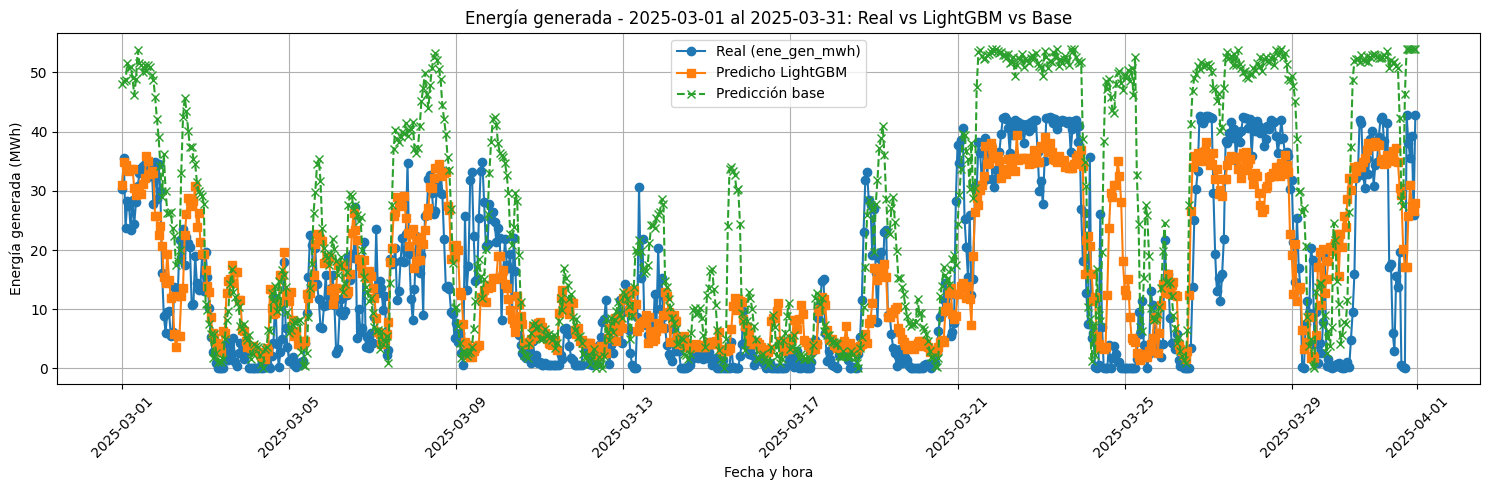

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

# === Período a graficar ===
fecha_inicio = "2025-03-01"
fecha_fin = "2025-03-31"

# === Recorte del período seleccionado ===
df_marzo = df.loc[fecha_inicio:fecha_fin].copy()

# === Alinear predicciones del modelo con el tramo seleccionado ===
df_marzo["pred_base"] = df_marzo["Power[kWh]"] / 1000
df_marzo["pred_model"] = pd.Series(y_pred, index=y_test.index).loc[df_marzo.index]
df_marzo["real"] = y_test.loc[df_marzo.index]

# === Gráfico comparativo ===
plt.figure(figsize=(15, 5))
plt.plot(df_marzo.index, df_marzo["real"], label="Real (ene_gen_mwh)", marker='o')
plt.plot(df_marzo.index, df_marzo["pred_model"], label="Predicho LightGBM", marker='s')
plt.plot(df_marzo.index, df_marzo["pred_base"], label="Predicción base", linestyle='--', marker='x')

plt.title(f"Energía generada - {fecha_inicio} al {fecha_fin}: Real vs LightGBM vs Base")
plt.xlabel("Fecha y hora")
plt.ylabel("Energía generada (MWh)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

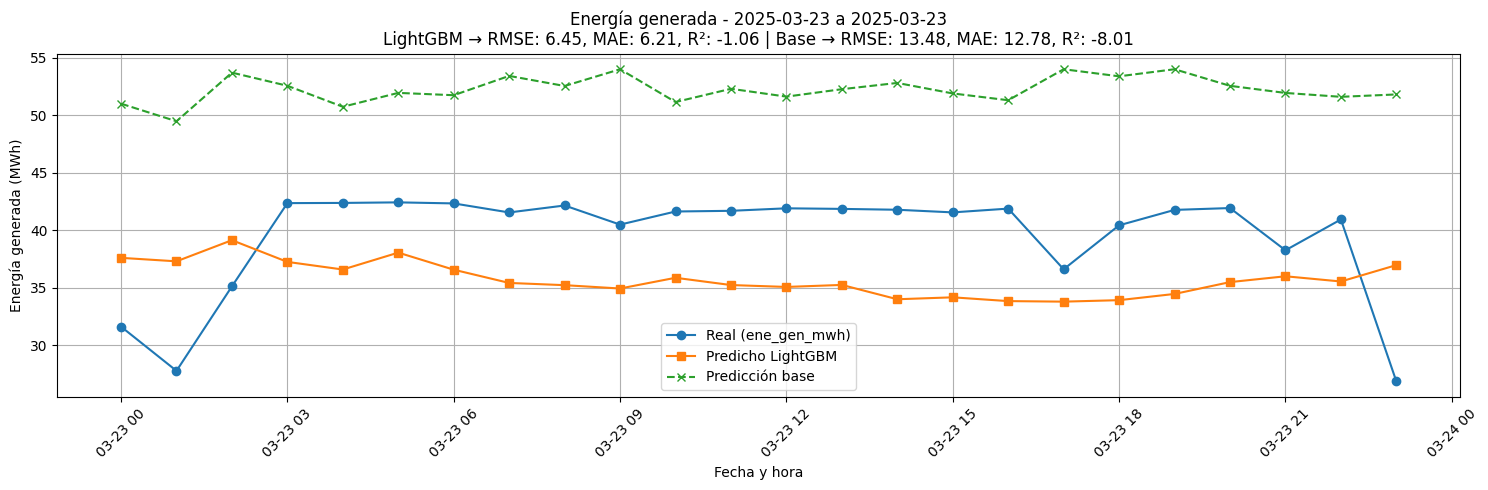

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Período a graficar ===
fecha_inicio = "2025-03-23"
fecha_fin = "2025-03-23"

# === Recorte del período seleccionado ===
df_marzo = df.loc[fecha_inicio:fecha_fin].copy()

# === Alinear predicciones del modelo con el tramo seleccionado ===
df_marzo["pred_base"] = df_marzo["Power[kWh]"] / 1000
df_marzo["pred_model"] = pd.Series(y_pred, index=y_test.index).loc[df_marzo.index]
df_marzo["real"] = y_test.loc[df_marzo.index]

# === Cálculo de métricas del período ===
rmse_model = np.sqrt(mean_squared_error(df_marzo["real"], df_marzo["pred_model"]))
mae_model = mean_absolute_error(df_marzo["real"], df_marzo["pred_model"])
r2_model = r2_score(df_marzo["real"], df_marzo["pred_model"])

rmse_base = np.sqrt(mean_squared_error(df_marzo["real"], df_marzo["pred_base"]))
mae_base = mean_absolute_error(df_marzo["real"], df_marzo["pred_base"])
r2_base = r2_score(df_marzo["real"], df_marzo["pred_base"])

# === Gráfico comparativo con métricas ===
plt.figure(figsize=(15, 5))
plt.plot(df_marzo.index, df_marzo["real"], label="Real (ene_gen_mwh)", marker='o')
plt.plot(df_marzo.index, df_marzo["pred_model"], label="Predicho LightGBM", marker='s')
plt.plot(df_marzo.index, df_marzo["pred_base"], label="Predicción base", linestyle='--', marker='x')

plt.title(f"Energía generada - {fecha_inicio} a {fecha_fin}\n"
          f"LightGBM → RMSE: {rmse_model:.2f}, MAE: {mae_model:.2f}, R²: {r2_model:.2f} | "
          f"Base → RMSE: {rmse_base:.2f}, MAE: {mae_base:.2f}, R²: {r2_base:.2f}")
plt.xlabel("Fecha y hora")
plt.ylabel("Energía generada (MWh)")
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


📊 Importancia de variables:
                                  Feature  Importance
26                                  month         331
25                                   hour         293
0            wind_speed_10m_previous_day0         212
4      relative_humidity_2m_previous_day0         178
2            temperature_2m_previous_day0         157
17                      ene_gen_mwh_lag96         156
19                    ene_gen_mwh_lag4320         130
3              pressure_msl_previous_day0         128
16                      ene_gen_mwh_lag72         125
15                    wind_delta_1h_prev0         116
23               ene_gen_mwh_delta72_2160         112
12                      wind_u_prev0_lag2          97
18                    ene_gen_mwh_lag2160          97
5                            wind_u_prev0          92
27                              dayofweek          87
6                            wind_v_prev0          82
14                      wind_v_prev0_lag2          77

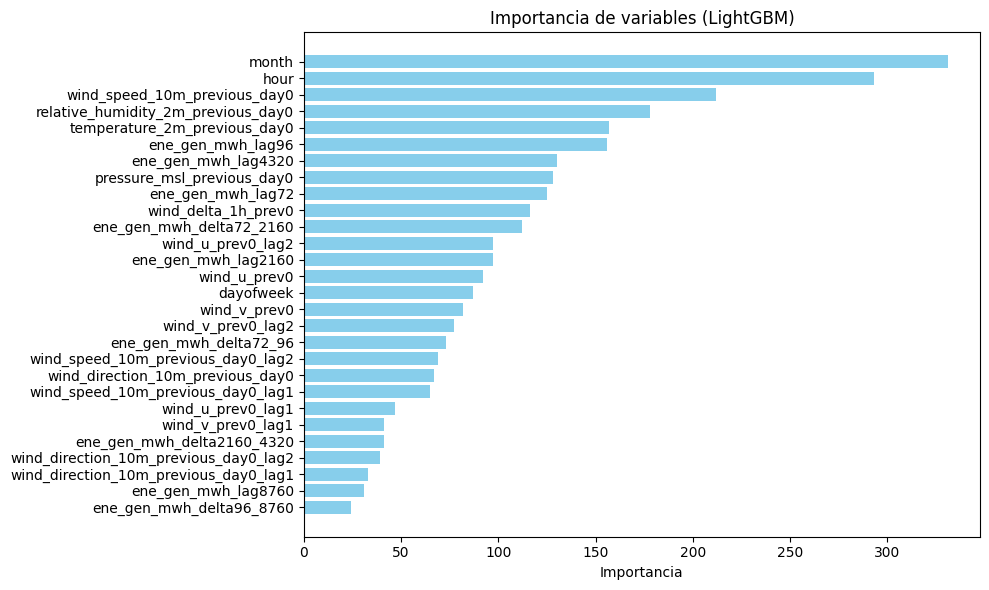

In [20]:
import pandas as pd
import matplotlib.pyplot as plt

# === Obtener importancias de variables del modelo entrenado ===
importances = best_model.feature_importances_
feature_names = X_train.columns  # Recomendado usar las del entrenamiento

# === Crear DataFrame ordenado ===
feat_imp = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by="Importance", ascending=False)

# === Mostrar tabla (opcional) ===
print("\n📊 Importancia de variables:")
print(feat_imp)

# === Gráfico de barras horizontal ===
plt.figure(figsize=(10, 6))
plt.barh(feat_imp["Feature"], feat_imp["Importance"], color='skyblue')
plt.gca().invert_yaxis()  # Para que la más importante esté arriba
plt.title("Importancia de variables (LightGBM)")
plt.xlabel("Importancia")
plt.tight_layout()
plt.show()

In [21]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === Recargar dataset (opcional) ===
df = pd.read_csv('/content/drive/MyDrive/tallertesis1/datasets/merged_energy_forecast.csv', parse_dates=["datetime"])
df = df.rename(columns={"despacho": "ene_gen_mwh"})  # solo si venía con otro nombre
df = df.set_index("datetime").sort_index()

# === Recortar marzo y alinear predicciones ===
df_marzo = df.loc["2025-03-01":"2025-03-31"].copy()
df_marzo["real"] = y_test.loc[df_marzo.index]
df_marzo["pred_model"] = pd.Series(y_pred, index=y_test.index).loc[df_marzo.index]
df_marzo["pred_base"] = df_marzo["Power[kWh]"] / 1000

# === Calcular métricas por día ===
resultados = []

for fecha, grupo in df_marzo.groupby(df_marzo.index.date):
    y_true = grupo["real"]
    y_model = grupo["pred_model"]
    y_base = grupo["pred_base"]

    resultados.append({
        "fecha": pd.to_datetime(fecha),
        "RMSE_LightGBM": np.sqrt(mean_squared_error(y_true, y_model)),
        "MAE_LightGBM": mean_absolute_error(y_true, y_model),
        "R²_LightGBM": r2_score(y_true, y_model),
        "RMSE_base": np.sqrt(mean_squared_error(y_true, y_base)),
        "MAE_base": mean_absolute_error(y_true, y_base),
        "R²_base": r2_score(y_true, y_base)
    })

# === Mostrar y exportar tabla ===
df_resultados = pd.DataFrame(resultados).set_index("fecha")
print(df_resultados)

# (opcional) Guardar resultados en CSV para entregar o analizar
df_resultados.to_csv("/content/drive/MyDrive/tallertesis1/resultados_diarios_lightgbm_vs_base.csv")


            RMSE_LightGBM  MAE_LightGBM  R²_LightGBM  RMSE_base   MAE_base  \
fecha                                                                        
2025-03-01       5.509481      4.435287    -0.365311  18.309162  17.417076   
2025-03-02       9.482372      8.593545    -2.138417  18.172910  16.838159   
2025-03-03       7.801761      6.206830    -1.714598   6.202945   4.774502   
2025-03-04       6.227151      4.899897    -1.151341   6.007381   4.817652   
2025-03-05       7.455145      6.259542    -0.084959  10.801541   8.782067   
2025-03-06       8.443811      7.197356    -0.726966  10.528758   9.311358   
2025-03-07       9.232213      7.994936    -0.647690  16.937405  14.165837   
2025-03-08       8.213715      6.407697     0.076720  21.170986  20.073592   
2025-03-09      16.198125     14.653076    -1.647547  14.559850  11.493252   
2025-03-10       5.760967      4.706413     0.482817  11.620448   8.969538   
2025-03-11       6.162173      5.677864    -9.171860   6.623753 